In [1]:
import bpy
from IPython.display import display, Image

def fresh_scene():
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Select all objects except cameras
    for obj in bpy.context.scene.objects:
        if  obj.type != 'CAMERA':
            obj.select_set(True)
        else:
            obj.select_set(False)
    bpy.ops.object.delete()
    
    # add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

# Choosing Objects

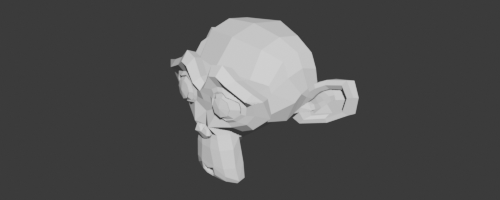

In [2]:
fresh_scene()
bpy.ops.mesh.primitive_monkey_add(size=2.5, location=(0, 0, 0))
render_result()

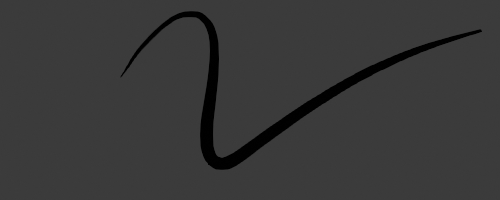

In [3]:
fresh_scene()
gpencil_object = bpy.ops.object.gpencil_add(location=(0, 0, 0), type='STROKE')
gpencil_object = bpy.context.active_object
gpencil_object.scale = (3, 3, 3)

render_result()

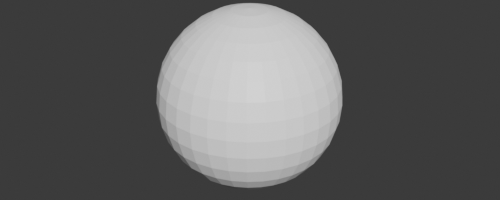

In [5]:
fresh_scene()
bpy.ops.mesh.primitive_uv_sphere_add(radius=1.5, location=(0, 0, 0)) 
render_result()

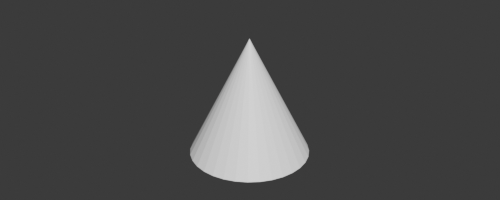

In [6]:
fresh_scene()
bpy.ops.mesh.primitive_cone_add(radius1=1, depth=2, location=(0, 0, 0))  
render_result()

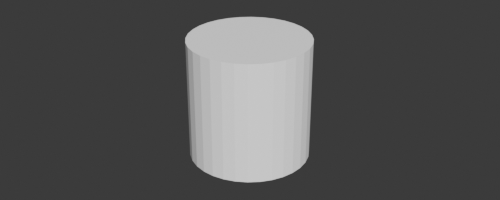

In [7]:
fresh_scene()
bpy.ops.mesh.primitive_cylinder_add(radius=1, depth=2, location=(0, 0, 0)) 
render_result()

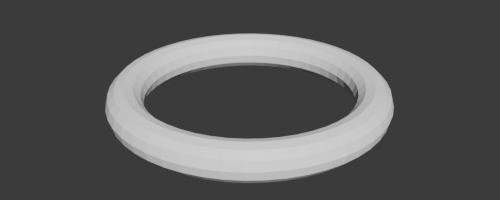

In [8]:
fresh_scene()
bpy.ops.mesh.primitive_torus_add(major_radius=2, minor_radius=0.3, location=(0,0, 0))
render_result()

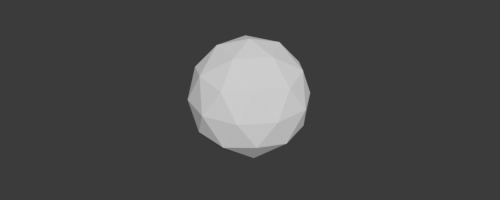

In [9]:
fresh_scene()
bpy.ops.mesh.primitive_ico_sphere_add(radius=1, location=(0, 0, 0)) 
render_result()

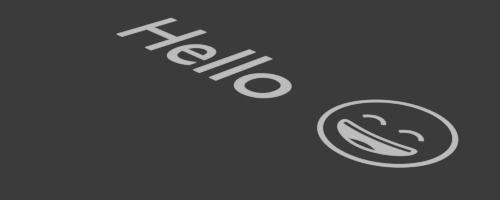

In [10]:
fresh_scene()
bpy.ops.object.text_add(location=(-4, 0, 0))
bpy.context.object.data.body = "Hello 😄"
bpy.context.object.scale = (2, 2, 2)
render_result()

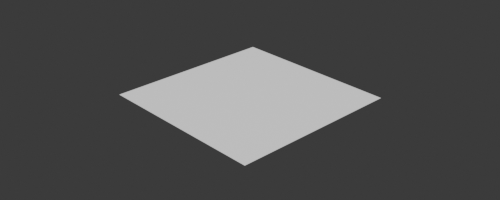

In [17]:
fresh_scene()
bpy.ops.mesh.primitive_plane_add(size=3, location=(0, 0, 0))  
render_result()

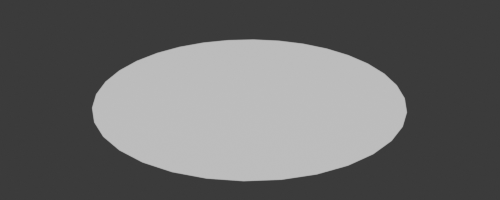

In [20]:
fresh_scene()
bpy.ops.mesh.primitive_circle_add(radius=2.5, location=(0, 0, 0), fill_type='NGON')
render_result()

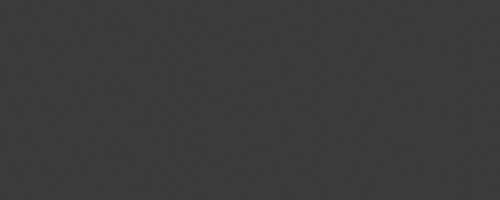

In [13]:
fresh_scene()
bpy.ops.object.empty_add(type='PLAIN_AXES', location=(4, 0, 0)) # (This is not shown in the image, but it is there :) )
render_result()

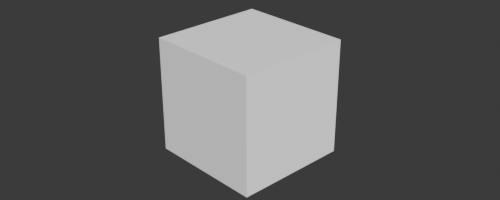

In [4]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
render_result()

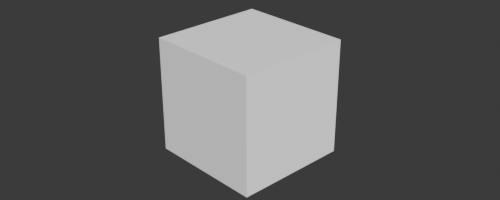

In [61]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
render_result()

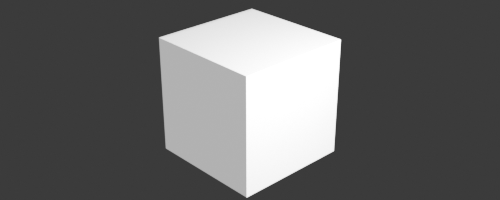

In [98]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
light = bpy.data.objects.new("Light", bpy.data.lights.new("Light", 'POINT'))
light.location = (3, 0, 2)
light.data.energy = 8000
bpy.context.collection.objects.link(light)
render_result()

# Applying Modifiers

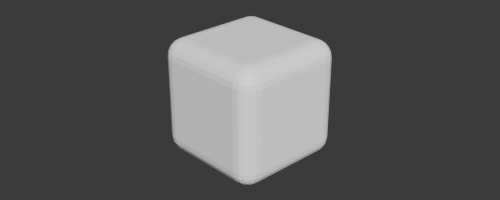

In [22]:
fresh_scene()
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0)) 
cube = bpy.context.active_object
bevel_modifier = cube.modifiers.new(name="Bevel", type='BEVEL')
bevel_modifier.width = 0.3  # Adjust the bevel width
bevel_modifier.segments = 5  # Number of segments for a smoother bevel

# Optionally apply the modifier if needed (not necessary for visualization)
# bpy.ops.object.modifier_apply(modifier="Bevel")

render_result()

# Settings

In [43]:
# current blender version
bpy.app.version_string

'4.2.0'

In [45]:
# current blender version
bpy.context.scene.render.engine

'BLENDER_EEVEE_NEXT'

In [46]:
bpy.context.scene.render.resolution_x, bpy.context.scene.render.resolution_y

(500, 200)

In [47]:
bpy.context.scene.name

'Scene'

In [48]:
bpy.context.active_object.name

'Cube'

In [49]:
bpy.context.active_object.location

Vector((0.0, 0.0, 0.0))

# Using colors

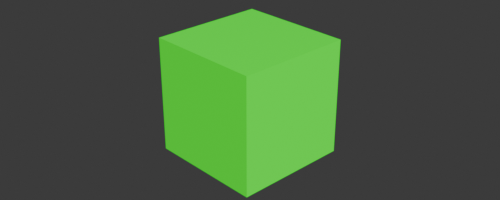

In [24]:
fresh_scene()

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create and assign a green material to the cube without using nodes
mat = bpy.data.materials.new(name="GreenMaterial")
mat.diffuse_color = (0, 1, 0, 1)  # Green color (R, G, B, A)

# Apply material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(mat)

render_result()

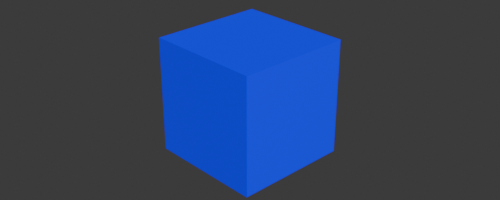

In [26]:
fresh_scene()

# colors with nodes

bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create and assign a blue material to the cube
mat = bpy.data.materials.new(name="BlueMaterial")
mat.use_nodes = True
bsdf = mat.node_tree.nodes.get('Principled BSDF')
bsdf.inputs['Base Color'].default_value = (0, 0, 1, 1)  # Blue color (R, G, B, A)

# Apply material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(mat)
render_result()

# Setting Up Shaders

Here's an example to generate the following shader tree
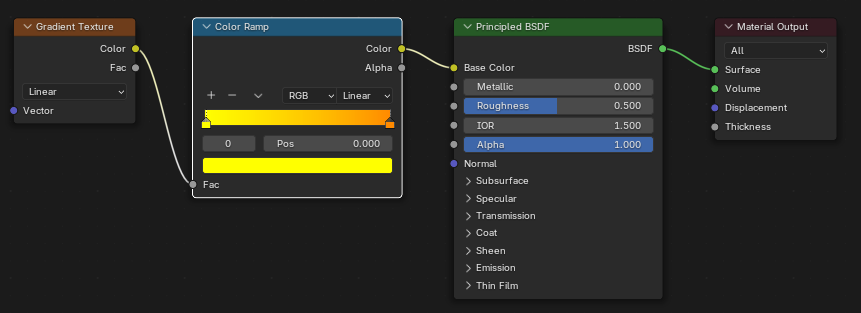
It's quite a lot of code, so I would recommend to better set up nodes in the GUI.

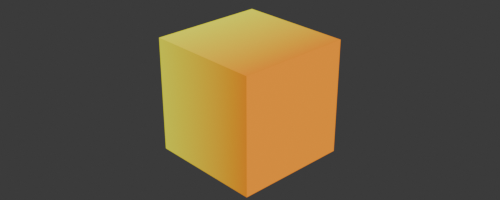

In [57]:
fresh_scene()

# Working with shader nodes is possible, but get's quite involved quite quickly

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Create a new material for the cube
material = bpy.data.materials.new(name="YellowToOrangeGradient")
material.use_nodes = True
nodes = material.node_tree.nodes

# Clear default nodes
for node in nodes:
    nodes.remove(node)

# Add a Gradient Texture
gradient = nodes.new(type="ShaderNodeTexGradient")
gradient.gradient_type = "LINEAR"
gradient.location = (0, 0)

# Add a Color Ramp to control the gradient colors
ramp = nodes.new(type="ShaderNodeValToRGB")
ramp.color_ramp.interpolation = "LINEAR"
ramp.location = (300, 0)

ramp.color_ramp.elements[0].color = (1, 1, 0, 1)  # Yellow (R, G, B, A)
ramp.color_ramp.elements[1].color = (1, 0.3, 0, 1)  # Orange (R, G, B, A)

# Add the Principled BSDF shader
bsdf = nodes.new(type="ShaderNodeBsdfPrincipled")
bsdf.location = (600, 0)

# Create the output node
output = nodes.new(type="ShaderNodeOutputMaterial")
output.location = (900, 0)

# Link the nodes together
links = material.node_tree.links
links.new(gradient.outputs["Color"], ramp.inputs[0])
links.new(ramp.outputs["Color"], bsdf.inputs["Base Color"])
links.new(bsdf.outputs["BSDF"], output.inputs["Surface"])

# Apply the material to the cube
cube.data.materials.clear()  # Clear any existing materials
cube.data.materials.append(material)

render_result()

# Saving files
You can any time also save your Blender file like this:

In [58]:
bpy.ops.wm.save_as_mainfile(filepath="scene.blend")

Info: Saved "scene.blend"


{'FINISHED'}

# Setting up Geometry Nodes

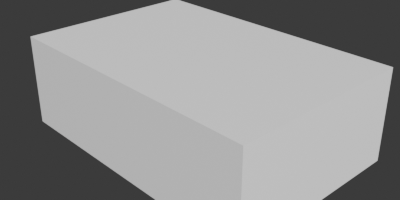

In [115]:
fresh_scene()

# Setting up geonodes is possible, but get's quite involved quite quickly

# Add a cube
bpy.ops.mesh.primitive_cube_add(size=2, location=(0, 0, 0))
cube = bpy.context.active_object

# Setup geometry nodes
geo_nodes = cube.modifiers.new(name="GeometryNodes", type="NODES")
node_group = bpy.data.node_groups.new("GeometryNodes", "GeometryNodeTree")
geo_nodes.node_group = node_group

# Create input/output and transformation nodes
inNode = node_group.nodes.new("NodeGroupInput")
outNode = node_group.nodes.new("NodeGroupOutput")
transformNode = node_group.nodes.new("GeometryNodeTransform")

# Define geometry input/output sockets
node_group.interface.new_socket(name="Geometry", in_out="INPUT", socket_type="NodeSocketGeometry")
node_group.interface.new_socket(name="Geometry", in_out="OUTPUT", socket_type="NodeSocketGeometry")

# Link the nodes together
node_group.links.new(inNode.outputs["Geometry"], transformNode.inputs["Geometry"])
node_group.links.new(transformNode.outputs["Geometry"], outNode.inputs["Geometry"])

# Set node positions
inNode.location = [-3 * inNode.width, 0]
outNode.location = [3 * outNode.width, 0]
transformNode.location = [0, 0]
transformNode.inputs["Scale"].default_value = (3, 2, 1)

render_result()

In [ ]:
bpy.ops.wm.save_as_mainfile(filepath="scene.blend")